In [15]:
import requests
import json
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

https://github.com/qihangZH/omniparse
Omniverse is a Machine-Learning Based document parser.
It may good for LLM and other textural jobs. 

May only run the code before you make sure that you have init your docker server on port 8000, or what else


In [2]:
# Specify the file path and the endpoint URL
file_path = r'./input_data/pdf_sample.pdf'
url = "http://localhost:8000/parse_document/pdf"

# same to 
# curl -X POST -F "file=@/path/to/document.pdf" http://localhost:8000/parse_document/pdf

# Open the file and send it as part of the POST request
with open(file_path, 'rb') as file:
    files = {'file': file}
    response = requests.post(url, files=files)

# Print the response from the server
print(response.status_code)  # HTTP status code
print(response.text)         # Response content

200
{"text":"A Primer on Sustainable *Business* is divided into two sections. Chapter 1 through Chapter 9 are organized along common business functional areas to allow the reader to see how each aspect of the business has a unique contribution to make in helping the business pursue the overarching goal of sustainability. In Chapter 2 of this section, we discuss how sustainability is at the heart of company operations. We further explore what the term sustainability means and its emphasis on the triple bottom line. In Chapter 3, we show how sustainability is related to the human resources function of the company. We organize the discussion by the components of human resources management: recruitment and selection, training and development, performance appraisal and feedback, and pay and benefits. Our human resources chapter concludes with a discussion on human rights issues. In Chapter 4, we discuss how sustainability impacts the function and industry of finance. In the finance function

We can also apply OCR in documents.

In [3]:
# Specify the file path and the endpoint URL
file_path = r'./input_data/ocr_sample.pdf'
url = "http://localhost:8000/parse_document/pdf"

# same to 
# curl -X POST -F "file=@/path/to/document.pdf" http://localhost:8000/parse_document/pdf

# Open the file and send it as part of the POST request
with open(file_path, 'rb') as file:
    files = {'file': file}
    response = requests.post(url, files=files)

# Print the response from the server
print(response.status_code)  # HTTP status code
print(response.text)         # Response content

200
{"text":"Ronald F. Mason, Jr.\n\nPresident\n\n![0_image_0.png](0_image_0.png)\n\n![0_image_1.png](0_image_1.png)\n\n## May 9, 2018\n\nThe Honorable Phil Mendelson Chairman Council of the District of Columbia John A. Wilson Building 1350 Pennsylvania Avenue, NW, Suite 504 Washington, DC 20004 Dear Chairman Mendelson:\nPursuant to D.C. Official Code §2-303.05(a)(3), the University of the District of Columbia (UDC) hereby submits to the Council of the District of Columbia a proposed Multiyear License Agreement and Contract GF-2018-C-0031. The proposed contract award for approval resolution will be for three (3) years, the dollar value is a firm fixed price of Thirty Three Thousand Eight Hundred Forty Dollars ($33,840.00) with Ambrose Video Publishing, Inc.\n\nThe prospective contractor, Ambrose Video Publishing, Inc. grants to UDC-TV a limited, terminable, nonexclusive and non-transferrable right to broadcast/cable/Internet live stream of cable channel transmission UDC-TV Channel 98, 

In [8]:
# read json to dict
datadict = json.loads(response.text)
datadict

{'text': 'Ronald F. Mason, Jr.\n\nPresident\n\n![0_image_0.png](0_image_0.png)\n\n![0_image_1.png](0_image_1.png)\n\n## May 9, 2018\n\nThe Honorable Phil Mendelson Chairman Council of the District of Columbia John A. Wilson Building 1350 Pennsylvania Avenue, NW, Suite 504 Washington, DC 20004 Dear Chairman Mendelson:\nPursuant to D.C. Official Code §2-303.05(a)(3), the University of the District of Columbia (UDC) hereby submits to the Council of the District of Columbia a proposed Multiyear License Agreement and Contract GF-2018-C-0031. The proposed contract award for approval resolution will be for three (3) years, the dollar value is a firm fixed price of Thirty Three Thousand Eight Hundred Forty Dollars ($33,840.00) with Ambrose Video Publishing, Inc.\n\nThe prospective contractor, Ambrose Video Publishing, Inc. grants to UDC-TV a limited, terminable, nonexclusive and non-transferrable right to broadcast/cable/Internet live stream of cable channel transmission UDC-TV Channel 98, RCN

In [14]:
datadict['images'][0]

{'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCAB1AHcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD7KHWlPSkANBqFsAUlGeaMj0qRi0jkAVHPIkUZd2CqBkk9q5/xR4s0rQtLs9SuGluYL24jtrb7MA/mSScKM5CgH1JAqZSUVdmlKjUrSUaau2dIDxRmvO/EXxKTRbTUY7zQ7211OztVu0tLmVFE8RcIWR0LjjPI6

Seems it also help us to extract the figures from the PDF? How about extract pics from it?

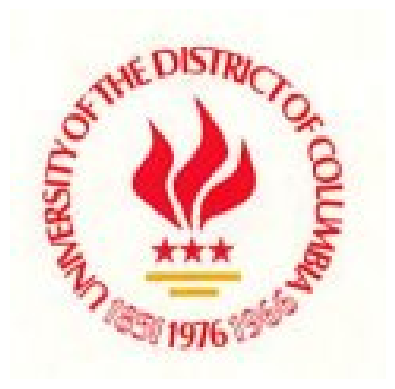

In [16]:
# Decode the Base64 string
image_bytes = base64.b64decode(datadict['images'][0]['image'])

# Load the image using PIL
image = Image.open(BytesIO(image_bytes))

# Display the image in the notebook
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

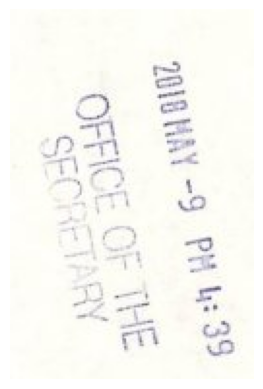

In [17]:
# Decode the Base64 string
image_bytes = base64.b64decode(datadict['images'][1]['image'])

# Load the image using PIL
image = Image.open(BytesIO(image_bytes))

# Display the image in the notebook
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

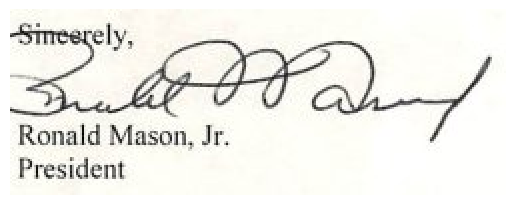

In [18]:
# Decode the Base64 string
image_bytes = base64.b64decode(datadict['images'][2]['image'])

# Load the image using PIL
image = Image.open(BytesIO(image_bytes))

# Display the image in the notebook
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()